#### 0 - Requirements
Check scikit-learn version, install tqdm if necessary, load useful packages.

In [1]:
import sklearn

In [2]:
print(f"You are using scikit-learn version {sklearn.__version__}")

You are using scikit-learn version 0.20.0


In [3]:
!conda install -y tqdm

Solving environment: done

# All requested packages already installed.



In [4]:
import pandas as pd
import numpy as np
import itertools

In [5]:
from helper import *

#### 1 - Feature extraction

##### a
- Feed ICUType as is into a linear model imply that the feature will be interpreted as a numerical feature. Especially this implies the order Coronary Care Unit < Cardiac Surgery < Recovery Unit < Surgical ICU. This can be circumvent by a one hot encoding preprocessing step.
- By aggregating the time series we lose information. For example we get rid of the variation of the features over time. Example of statistics: max, min, max - min

##### b
Mean imputation is very sensitive to outliers so an asumption to check could be the absence of extreme values. We can use other statistics such as the mode, create a new modality to account for a missing value or to think about more complex methods (ex: k nearest neighbors imputation).

##### c
This is to avoid that features with a wider scale have a greater impact during the model training. For example pH has a finite scale (0-14) while weight hasn't and can have much bigger values.

##### d

In [6]:
X_train, y_train, X_test, y_test, feature_names = get_train_test_split()

Generating feature vectors: 100%|██████████| 2500/2500 [00:16<00:00, 155.05it/s]


In [7]:
print("Dimensionality:")
print(f"d = {X_train.shape[1]}")

Dimensionality:
d = 40


In [8]:
print("Average feature vector:")
print(pd.DataFrame({"Feature Name": feature_names, "Mean value": X_train.mean(axis=0)}))

Average feature vector:
        Feature Name  Mean value
0                Age    0.653507
1             Gender    0.557000
2             Height    0.390707
3            ICUType    0.578333
4             Weight    0.236098
5           mean_ALP    0.058284
6           mean_ALT    0.015867
7           mean_AST    0.013781
8       mean_Albumin    0.445900
9           mean_BUN    0.143020
10    mean_Bilirubin    0.039455
11  mean_Cholesterol    0.368926
12   mean_Creatinine    0.082277
13      mean_DiasABP    0.555640
14         mean_FiO2    0.359233
15          mean_GCS    0.720369
16      mean_Glucose    0.207822
17         mean_HCO3    0.382337
18          mean_HCT    0.416416
19           mean_HR    0.467974
20            mean_K    0.338213
21      mean_Lactate    0.076291
22          mean_MAP    0.300090
23           mean_Mg    0.158574
24    mean_NIDiasABP    0.542114
25        mean_NIMAP    0.575976
26     mean_NISysABP    0.501373
27           mean_Na    0.515676
28        mean_PaCO

#### 2 - Hyperparameter and model selection

##### 2.1 - Linear-kernel SVM

##### a

In [9]:
def cv_performance(clf, X, y, metric='auroc', k=5):
    """
    Splits the data X and the labels y into k-folds and runs k-fold
    cross-validation: for each fold i in 1...k, trains a classifier on
    all the data except the ith fold, and tests on the ith fold.
    Calculates the k-fold cross-validation performance metric for classifier
    clf by averaging the performance across folds.
    Input:
        clf: an instance of SVC()
        X: (n,d) array of feature vectors, where n is the number of examples
           and d is the number of features
        y: (n,) array of binary labels {1,-1}
        k: an int specifying the number of folds (default=5)
        metric: string specifying the performance metric (default='auroc'
             other options: 'f1-score', 'auroc', 'precision', 'sensitivity',
             and 'specificity')
    Returns:
        average 'validation' performance across the k folds as np.float64
    """
    # TODO: Finish implementing this function
    skf = StratifiedKFold(n_splits=k)
    scores = []
    # For each split in the k folds...
    for train, val in skf.split(X,y):
    # Fit the data to the training data...
    
        # Fit the data to the training data...
        
        # And get test performance on the val fold.
        score = []
        scores.append(score)

    # And return the average performance across all fold splits.
    return np.array(scores).mean()

##### b

In [10]:
def select_param_linear(X, y, metric='auroc', k=5, C_range = []):
    """
    Sweeps different settings for the hyperparameter of a linear-kernel SVM,
    calculating the k-fold CV performance for each setting on X, y.
    Input:
        X: (n,d) array of feature vectors, where n is the number of examples
        and d is the number of features
        y: (n,) array of binary labels {1,-1}
        k: int specifying the number of folds (default=5)
        metric: string specifying the performance metric (default='accuracy',
             other options: 'f1-score', 'auroc', 'precision', 'sensitivity',
             and 'specificity')
        C_range: an array with C values to be searched over
    Returns:
        The parameter value for a linear-kernel SVM that maximizes the
        average 5-fold CV performance.
    """
    # TODO: Finish implementing this function
    #HINT: You should be using your cv_performance function here
    #to evaluate the performance of each SVM
    print("Linear SVM Hyperparameter Selection based on %s:" %metric)
    scores = []
    # Iterate over all of the given c parameters...
    for c in C_range:
        #Calculate the average performance on k-fold cross-validation
        score = []
        print("C: %.3f score: %.4f" % (c, score))
        scores.append((c, score))
        
    # Return the C value with the maximum score
    maxval = max(scores, key=lambda x: x[1])
    return maxval[0]

##### c

In [11]:
best_C = select_param_linear(X_train, y_train, 'auroc', 5, np.logspace(-3, 3, 7))

Linear SVM Hyperparameter Selection based on auroc:
C: 0.001 score: 0.7691
C: 0.010 score: 0.7676
C: 0.100 score: 0.7689
C: 1.000 score: 0.7737
C: 10.000 score: 0.7718
C: 100.000 score: 0.7708
C: 1000.000 score: 0.7688


In [12]:
print(f"Performance against C increases then decreases. Best C is {best_C:.3f}")

Performance against C increases then decreases. Best C is 1.000


In [13]:
linear_clf = get_classifier(C=best_C)
linear_clf.fit(X_train, y_train)
test_perf = performance(linear_clf, X_test, y_test, 'auroc')

##### d

In [14]:
print(f"Test performance is {test_perf:.4f}")

Test performance is 0.8418


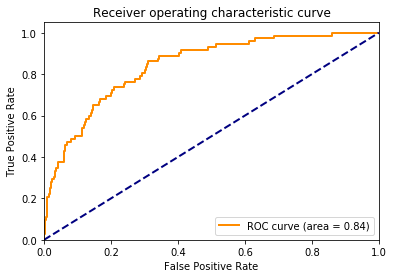

In [15]:
plot_ROC_curve(linear_clf, X_test, y_test)

##### e

In [16]:
linear_clf = get_classifier(C=1)
linear_clf.fit(X_train, y_train)
weights = pd.DataFrame({'feature_name': feature_names, 'weight': linear_clf.coef_[0]})

In [17]:
print(f"Features ranked per coefficient:")
print(weights.sort_values(by='weight', ascending=False))

Features ranked per coefficient:
        feature_name    weight
39           mean_pH  0.677943
7           mean_AST  0.484692
21      mean_Lactate  0.362667
10    mean_Bilirubin  0.297603
5           mean_ALP  0.263556
9           mean_BUN  0.155025
38          mean_WBC  0.077498
0                Age  0.067744
35    mean_TroponinI  0.066873
22          mean_MAP  0.065677
31     mean_RespRate  0.058358
19           mean_HR  0.050881
26     mean_NISysABP  0.049003
18          mean_HCT  0.041773
11  mean_Cholesterol  0.041305
16      mean_Glucose  0.036840
30    mean_Platelets  0.032735
14         mean_FiO2  0.020657
36    mean_TroponinT  0.013341
1             Gender  0.005947
3            ICUType  0.004637
8       mean_Albumin  0.003720
33       mean_SysABP  0.003638
2             Height  0.001137
28        mean_PaCO2 -0.000406
25        mean_NIMAP -0.019868
4             Weight -0.030102
29         mean_PaO2 -0.030510
17         mean_HCO3 -0.042887
12   mean_Creatinine -0.043633
24    

On the [Glasgow Coma Scale](https://en.wikipedia.org/wiki/Glasgow_Coma_Scale) a higher value indicates a higher level of consciousness for the patient (the higher the better), hence the negative coeficient for mean_GCS makes sense.

##### 2.2 - RBF-kernel SVM

##### a

In [18]:
def select_param_rbf(X, y, metric='auroc', k=5, param_range=[]):
    """
    Sweeps different settings for the hyperparameters of an RBF-kernel SVM,
    calculating the k-fold CV performance for each setting on X, y.
    Input:
        X: (n,d) array of feature vectors, where n is the number of examples
           and d is the number of features
        y: (n,) array of binary labels {1,-1}
        k: an int specifying the number of folds (default=5)
        metric: string specifying the performance metric (default='accuracy'
                 other options: 'f1-score', 'auroc', 'precision', 'sensitivity',
                 and 'specificity')
        parameter_values: a (num_param, 2)-sized array containing the
            parameter values to search over. The first column should
            represent the values for C, and the second column should
            represent the values for gamma. Each row of this array thus
            represents a pair of parameters to be tried together.
    Returns:
        The parameter value(s) for a RBF-kernel SVM that maximize
        the average 5-fold CV performance
    """
    # TODO: Finish implementing this function
    # Hint: This will be very similar to select_param_linear, except
    # the type of SVM model you are using will be different...
    print("RBF SVM Hyperparameter Selection based on %s:" %metric)
    scores = []
    # For each parameter pair to try...
    for p in param_range:
        # Determine the performance of the defined SVM
        gamma=0.0
        c=0.0
        score=[]
        print("C: %.3f gamma: %.3f score: %.4f" % (c, gamma, score))
        scores.append((c, gamma, score))
    # And report the pair (C,gamma) that yielded the best metric performance
    maxval = max(scores, key=lambda x: x[2])
    return maxval[0], maxval[1]


##### b

In [19]:
import itertools

In [20]:
C_range = np.logspace(-3, 3, 7)
coeff_range = list(np.logspace(-3, 3, 7))
param_range = list(itertools.product(C_range, coeff_range))
best_C, best_gamma = select_param_rbf(X_train, y_train, 'auroc', 5, param_range)

RBF SVM Hyperparameter Selection based on auroc:
C: 0.001 gamma: 0.001 score: 0.7447
C: 0.001 gamma: 0.010 score: 0.7524
C: 0.001 gamma: 0.100 score: 0.7505
C: 0.001 gamma: 1.000 score: 0.7869
C: 0.001 gamma: 10.000 score: 0.7366
C: 0.001 gamma: 100.000 score: 0.6772
C: 0.001 gamma: 1000.000 score: 0.5000
C: 0.010 gamma: 0.001 score: 0.7447
C: 0.010 gamma: 0.010 score: 0.7524
C: 0.010 gamma: 0.100 score: 0.7730
C: 0.010 gamma: 1.000 score: 0.8056
C: 0.010 gamma: 10.000 score: 0.7910
C: 0.010 gamma: 100.000 score: 0.7377
C: 0.010 gamma: 1000.000 score: 0.5000
C: 0.100 gamma: 0.001 score: 0.7456
C: 0.100 gamma: 0.010 score: 0.7572
C: 0.100 gamma: 0.100 score: 0.7866
C: 0.100 gamma: 1.000 score: 0.8059
C: 0.100 gamma: 10.000 score: 0.7912
C: 0.100 gamma: 100.000 score: 0.7396
C: 0.100 gamma: 1000.000 score: 0.5000
C: 1.000 gamma: 0.001 score: 0.7624
C: 1.000 gamma: 0.010 score: 0.7732
C: 1.000 gamma: 0.100 score: 0.7850
C: 1.000 gamma: 1.000 score: 0.8055
C: 1.000 gamma: 10.000 score: 0.7

##### b

In [21]:
print(f"The best pair of parameters is (C, gamma) = ({best_C:.6f}, {best_gamma:.5f})")

The best pair of parameters is (C, gamma) = (0.100000, 1.00000)


In [22]:
rbf_clf = get_classifier(kernel='rbf', C=best_C, gamma=best_gamma)
rbf_clf.fit(X_train, y_train)
test_perf = performance(rbf_clf, X_test, y_test, "auroc")

In [24]:
print(f"Test performance is {test_perf:.4f}. We observe a slight improvement in comparison with the linear-kernel SVM.")

Test performance is 0.8535. We observe a slight improvement in comparison with the linear-kernel SVM.


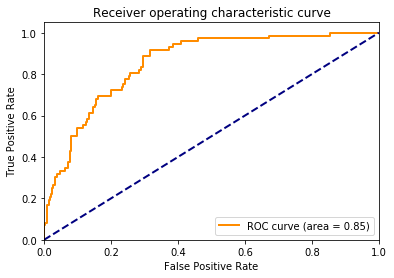

In [25]:
plot_ROC_curve(rbf_clf, X_test, y_test)